In [0]:
#importo las librerias necesarias. Eso es un comentario. Toda linea que comience con # sera un comentario que Python no intentara ejecutar
import geopandas
import matplotlib.pyplot 

%matplotlib inline

In [0]:
'''importo una libreria de drive Google Clab que me llama Drive que me permite conectar este notebook con mis archivos en Drive.  
Este es otro comentario pero como es mas largo puedo escirbir varias lineas abriendo y cerrando con triple comilla simple o doble
Puede que necesiten realizar el paso de validacion con su cuenta de gmail ingresando el codigo tal cual vimos en clase
'''
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#leo el shapefile utilizando la funcion read_file() de la libreria geopandas y lo guardo en la variable radios
#noten que para empezar otra linea, agregado un nuevo #
# vean que la ruta del archivo del shape utiliza la estructura de MI Drive, el de uds puede ser diferente. Consulten la filmina correspondiente
radios = geopandas.read_file("/content/drive/My Drive/python2019/informacion-censal-por-radio-2010/informacion_censal_por_radio_2010.shp")

In [0]:
#visualizo los primeros registros de mi variable radios
radios.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


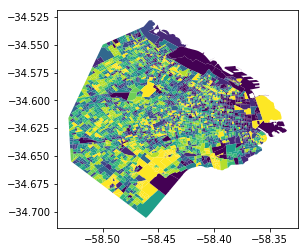

In [0]:
#realizo un primer plot sencillo de mi shape
radios.plot()

In [0]:
#en algunos casos fue necesario instalar la libreria mapclassify para poder mapear nuestro shape. Si ese es el caso corran esta celda, ELIMINANDO EL # al comienzo antes del ! y mantengan el !
#!pip install mapclassify

In [0]:
#realizo otro plot sin especificar algun criterio de visualizacion
radios.plot(column = "POBLACI")

In [0]:
#realizo un plot especificando criterios de visualizacion de 10 quintiles 
radios.plot(column = "POBLACI", scheme = "Quantiles", k = 10)

In [0]:
#reproyecto mi shape a una proyeccion en metros. Pueden leer mas en: http://epsg.io/3857
radios_metros = radios.to_crs(epsg = 3857)
radios_metros.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943...."
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471...."
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543...."
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399...."
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178...."


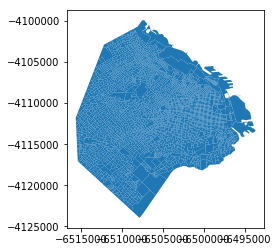

In [0]:
#los ejes de coordenadas ya nos nuestran un cambio de unidad de medida
radios_metros.plot()

In [0]:
#obtenemos el area de cada radio censal al extraer la PROPIEDAD geografica area de nuestra columna geometry. Area no lleva () porque es una propiedad, no una funcion. Veremos esto mas adelante.
radios_metros["area_m"] = radios_metros.geometry.area

In [0]:
#como nuestra proyeccion esta en metros y queremos pasarlo a km2, debemos dividir nuestra columna area en metros (area_m) por 1000000
radios_metros["area_km"] = radios_metros.area_m / 1000000

In [0]:
#finalmente dividimos nuestra poblacion por el area en km2
radios_metros['densidad'] = radios_metros.POBLACI / radios_metros.area_km

radios_metros.head()

,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry,area_m,area_km,densidad
0,1_1_1,RETIRO,1,336.0,82.0,65.0,19.0,1.798997,"POLYGON ((-6497929.484 -4108572.020, -6497943....",2.660685e+06,2.660685,126.283256
1,1_12_1,SAN NICOLAS,1,341.0,365.0,116.0,25.0,0.018565,"POLYGON ((-6499491.512 -4110255.197, -6499471....",2.746859e+04,0.027469,12414.178936
2,1_12_10,SAN NICOLAS,1,296.0,629.0,101.0,1.0,0.044380,"POLYGON ((-6498696.826 -4110369.483, -6498543....",6.566604e+04,0.065666,4507.657512
3,1_12_11,SAN NICOLAS,1,528.0,375.0,136.0,7.0,0.366340,"POLYGON ((-6497420.916 -4110414.929, -6497399....",5.420509e+05,0.542051,974.078198
4,1_12_2,SAN NICOLAS,1,229.0,445.0,129.0,16.0,0.018363,"POLYGON ((-6499336.819 -4110244.172, -6499178....",2.717014e+04,0.027170,8428.368902


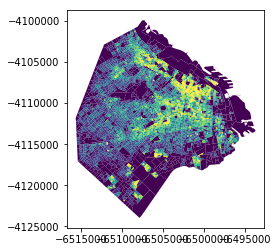

In [0]:
#ploteamos los resultados
radios_metros.plot(column = "densidad",scheme = "Quantiles", k = 10)